In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

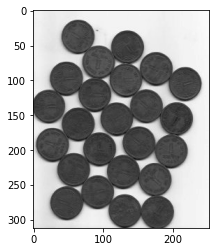

In [2]:
img=cv2.imread("./water_coins.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,'gray')

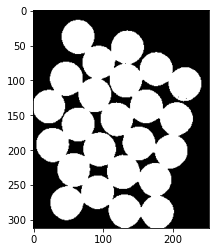

In [3]:
ret,thresh=cv2.threshold(gray,127.5,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh,'gray')

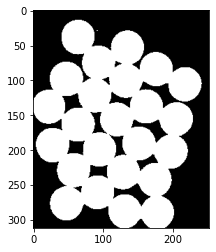

In [4]:
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh,'gray')

In [10]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [32]:
# plt.imshow(unknown,'gray')

# plt.imshow(dist_transform,'gray')

In [25]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [27]:
# plt.imshow(markers,'gray')

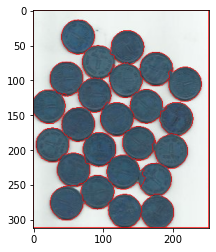

In [29]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img,'gray')

# 